# Project Introduction

This project comes from **UCLA’s Computer Science M148: Introduction to Data Science.** Its goal is to explore a broad range of data science techniques and apply them to real datasets. Through this work, we aim to build a portfolio that demonstrates proficiency in data exploration, feature engineering, model development, and predictive analytics.

## Dataset Selection

For our project, we have chosen the **Heart Failure Prediction Dataset,** a clinical dataset commonly used to study risk factors associated with heart failure and patient mortality. This dataset contains a mixture of demographic information, laboratory measurements, and clinical indicators.

We selected this dataset because heart failure is a major public-health concern, and understanding the factors that contribute to a patient’s risk can help support earlier intervention and more informed clinical decision-making. The dataset’s size, cleanliness, and clearly defined variables also make it well-suited for building interpretable machine-learning models.

## Main Features in the Data and Their Importance

Our project focuses on predicting heart failure and patient death, and understanding which features are most strongly associated with these outcomes. Early detection of risk signals can provide significant clinical value, and machine-learning models are well-suited for identifying complex patterns across multiple health indicators.

The dataset includes the following key features:
- **Age**
  - Age is one of the strongest predictors for
  cardiovascular complications. Risk of heart failure increases significantly in older populations.
- **Anaemia (boolean)**
  - Indicates whether the patient has reduced red blood cell count. Anaemia limits oxygen delivery to tissues and can worsen cardiac stress.
- **Creatine Phosphokinase (CPK) Levels**
  - Measures the concentration of a key enzyme released during muscle damage. High CPK levels may indicate heart muscle injury or ongoing cardiac strain.
- **Diabetes (boolean)**
  - Diabetes contributes to vascular damage and is strongly associated with elevated risk of heart disease and mortality.
- **Ejection Fraction (%)**
  - Represents the percentage of blood the heart pumps out with each contraction. Lower values directly signal reduced heart function and are a critical clinical indicator.
- **High Blood Pressure (boolean)**
  - Chronic hypertension increases the workload on the heart, making it a significant predictor of heart failure.
- **Platelet Count**
  - Platelets play an important role in blood clotting. Abnormal platelet counts can signal inflammation or disease progression.
- **Serum Sodium**
  - Low sodium levels (hyponatremia) are associated with severe heart failure and poor outcomes.
- **Gender**
  - Heart disease manifests differently across genders; including this feature allows the model to capture these differences.
- **Smoking Status (boolean)**
  - Smoking is a well-established risk factor for cardiovascular damage and increased mortality risk.
- **Follow-Up Period (Days)**
  - Indicates how long each patient was monitored. This is particularly important for time-to-event or survival-related analyses.
- **Death Event (boolean)**
  - The target variable, identifying whether the patient died during the follow-up period. This outcome is the focus of our predictive modeling.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-failure-clinical-data' dataset.
Path to dataset files: /kaggle/input/heart-failure-clinical-data


In [ ]:
import pandas as pd
import os

# Load the dataset directly using pandas from the downloaded path
downloaded_path = '/kaggle/input/heart-failure-clinical-data'
file_name = 'heart_failure_clinical_records_dataset.csv'
file_path = os.path.join(downloaded_path, file_name)

heart_df = pd.read_csv(file_path)

In [ ]:
%pip install scikit-lego

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression


np.random.seed(67)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

# EDA Analysis

Before building predictive models, it is essential to develop a thorough understanding of the dataset. In this section, we conduct Exploratory Data Analysis (EDA) to examine the structure, distribution, and relationships among the features. This includes analyzing summary statistics, identifying patterns or trends, checking for missing or inconsistent values, and visualizing key variables.
EDA helps us uncover important insights about the clinical characteristics of the patients, guides feature engineering decisions, and ensures that the dataset is suitable for downstream modeling.

In [ ]:
# check randomly to get a rough idea of what data values you can find
heart_df.sample(20, random_state=67)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
226,58.0,1,57,0,25,0,189000.00,1.30,132,1,1,205,0
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
292,52.0,0,190,1,38,0,382000.00,1.00,140,1,1,258,0
176,69.0,0,1419,0,40,0,105000.00,1.00,135,1,1,147,0
256,65.0,0,326,0,38,0,294000.00,1.70,139,0,0,220,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1
264,61.0,0,582,1,38,0,147000.00,1.20,141,1,0,237,0
240,70.0,0,81,1,35,1,533000.00,1.30,139,0,0,212,0
173,50.0,1,115,0,20,0,189000.00,0.80,139,1,0,146,0


In [ ]:
# how much data there is (rows, columns)
heart_df.shape

(299, 13)

In [ ]:
# clearly state the columns
heart_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# see if all the data is clean (no missing values)
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# understand scales and variability
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
heart_df.corr() #not a lot of trends other than death and time

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
# This is a data cleaning function. Makes it easy to modify the db.
def clean_heart(heart_df, predictor_variable = None):
  # rename column names
  heart_clean = heart_df.rename(columns={
    "age": "age",
    "anaemia": "decreased_red_blood_cells_or_hemoglobin_anaemia_binary",
    "creatinine_phosphokinase": "cpk_enzyme_levels_mcg_l",
    "diabetes": "diabetes_binary",
    "ejection_fraction": "blood_exiting_heart_per_contraction_percent",
    "high_blood_pressure": "high_blood_pressure_binary",
    "platelets": "platelets_in_blood_amount_kiloplatelets_per_ml",
    "serum_creatinine": "serum_creatinine_amount_mg_per_dl",
    "serum_sodium": "serum_sodium_levels_millimolar",
    "sex": "gender_binary",
    "smoking": "smoking_binary",
    "time": "period_of_follow_up_days",
    "DEATH_EVENT": "death_event_binary"
    })
  # filter to relevant columns
  # heart_clean = heart_clean[[ #time does not seem very relevant
  #     "age",
  #     "decreased_red_blood_cells_or_hemoglobin_anaemia_binary",
  #     "cpk_enzyme_levels_mcg_l",
  #     "diabetes_binary",
  #     "blood_exiting_heart_per_contraction_percent",
  #     "high_blood_pressure_binary",
  #     "platelets_in_blood_amount_kiloplatelets_per_ml",
  #     "serum_creatinine_amount_mg_per_dl",
  #     "serum_sodium_levels_millimolar",
  #     "gender_binary",
  #     "smoking_binary",
  #     "death_event_binary"
  # ]]

  if (predictor_variable is not None):
    heart_clean = heart_clean[[predictor_variable]]

  return(heart_clean)

In [ ]:
cleaned_heart_df = clean_heart(heart_df)
cleaned_heart_df

,age,decreased_red_blood_cells_or_hemoglobin_anaemia_binary,cpk_enzyme_levels_mcg_l,diabetes_binary,blood_exiting_heart_per_contraction_percent,high_blood_pressure_binary,platelets_in_blood_amount_kiloplatelets_per_ml,serum_creatinine_amount_mg_per_dl,serum_sodium_levels_millimolar,gender_binary,smoking_binary,period_of_follow_up_days,death_event_binary
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
cleaned_heart_df.columns

Index(['age', 'decreased_red_blood_cells_or_hemoglobin_anaemia_binary',
       'cpk_enzyme_levels_mcg_l', 'diabetes_binary',
       'blood_exiting_heart_per_contraction_percent',
       'high_blood_pressure_binary',
       'platelets_in_blood_amount_kiloplatelets_per_ml',
       'serum_creatinine_amount_mg_per_dl', 'serum_sodium_levels_millimolar',
       'gender_binary', 'smoking_binary', 'period_of_follow_up_days',
       'death_event_binary'],
      dtype='object')

In [ ]:
# We are predicting death so we want to see if anything is highly correlated before standizing the data
cleaned_heart_df_corr = cleaned_heart_df.corr()['death_event_binary'].sort_values(ascending=False)
print(cleaned_heart_df_corr)

# Standard scaling is done later on.

death_event_binary                                        1.000000
serum_creatinine_amount_mg_per_dl                         0.294278
age                                                       0.253729
high_blood_pressure_binary                                0.079351
decreased_red_blood_cells_or_hemoglobin_anaemia_binary    0.066270
cpk_enzyme_levels_mcg_l                                   0.062728
diabetes_binary                                          -0.001943
gender_binary                                            -0.004316
smoking_binary                                           -0.012623
platelets_in_blood_amount_kiloplatelets_per_ml           -0.049139
serum_sodium_levels_millimolar                           -0.195204
blood_exiting_heart_per_contraction_percent              -0.268603
period_of_follow_up_days                                 -0.526964
Name: death_event_binary, dtype: float64


/tmp/ipython-input-745466849.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")


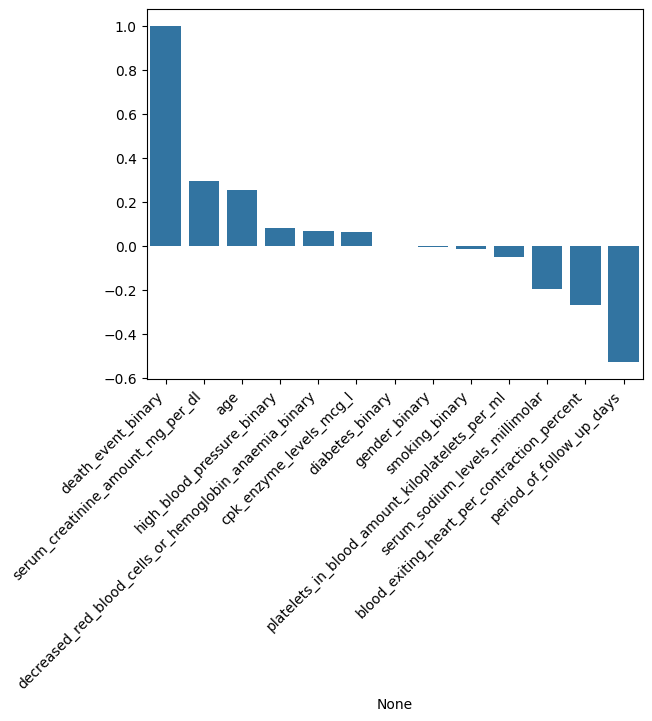

In [ ]:
# probably need a little bit more than this to make a decision

fig = sns.barplot(x=cleaned_heart_df_corr.index, y=cleaned_heart_df_corr.values)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")

plt.show()

In [ ]:
binary_heart = cleaned_heart_df[['decreased_red_blood_cells_or_hemoglobin_anaemia_binary', 'diabetes_binary', 'high_blood_pressure_binary', 'gender_binary', 'smoking_binary', 'death_event_binary']].copy()
binary_heart

,decreased_red_blood_cells_or_hemoglobin_anaemia_binary,diabetes_binary,high_blood_pressure_binary,gender_binary,smoking_binary,death_event_binary
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


/tmp/ipython-input-419074482.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")


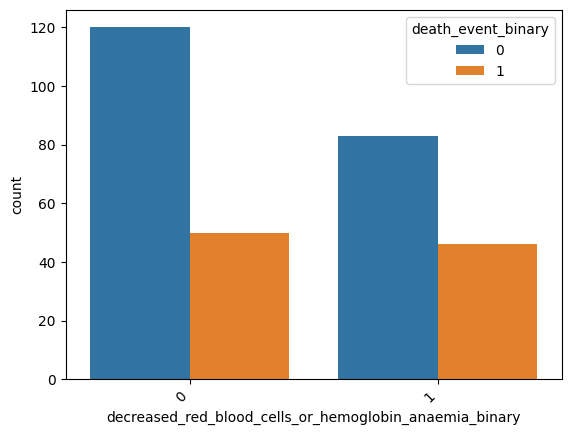

/tmp/ipython-input-419074482.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")


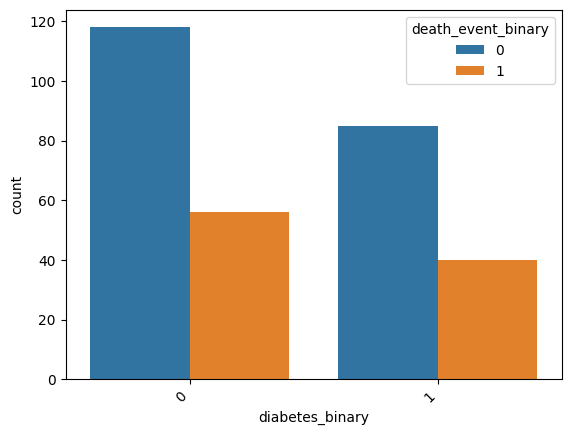

/tmp/ipython-input-419074482.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")


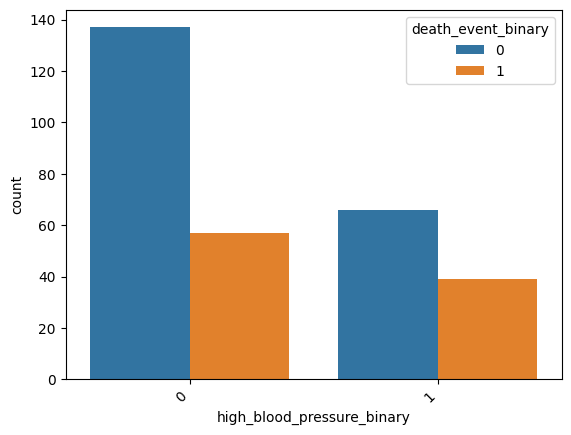

/tmp/ipython-input-419074482.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")


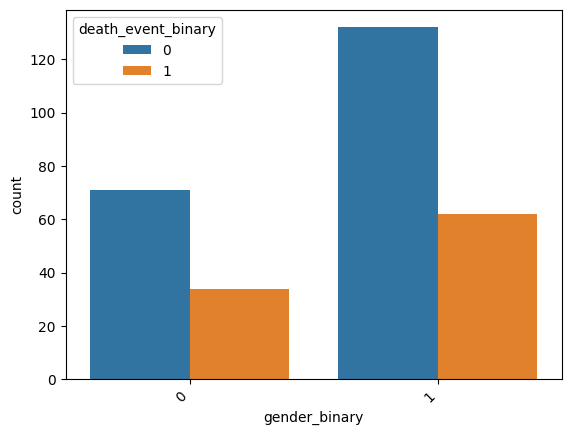

/tmp/ipython-input-419074482.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")


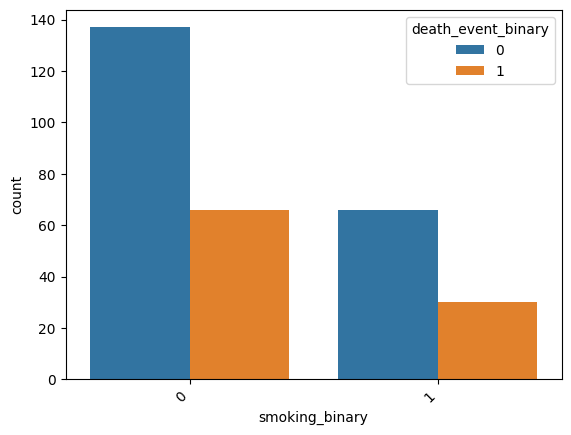

In [ ]:
# list of plots to see any patterns or bias in data.
for column in binary_heart.columns:
    if column == 'death_event_binary':
      continue

    df = binary_heart.groupby([column, 'death_event_binary']).size().reset_index(name='count')

    fig = sns.barplot(x=column, y='count', hue='death_event_binary', data=df)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha="right")

    plt.show()

In [ ]:
heart_non_binary_df = cleaned_heart_df[['age', 'cpk_enzyme_levels_mcg_l', 'blood_exiting_heart_per_contraction_percent', 'platelets_in_blood_amount_kiloplatelets_per_ml', 'serum_creatinine_amount_mg_per_dl', 'serum_sodium_levels_millimolar', 'death_event_binary']].copy()
heart_non_binary_df

,age,cpk_enzyme_levels_mcg_l,blood_exiting_heart_per_contraction_percent,platelets_in_blood_amount_kiloplatelets_per_ml,serum_creatinine_amount_mg_per_dl,serum_sodium_levels_millimolar,death_event_binary
0,75.0,582,20,265000.00,1.9,130,1
1,55.0,7861,38,263358.03,1.1,136,1
2,65.0,146,20,162000.00,1.3,129,1
3,50.0,111,20,210000.00,1.9,137,1
4,65.0,160,20,327000.00,2.7,116,1
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,0
295,55.0,1820,38,270000.00,1.2,139,0
296,45.0,2060,60,742000.00,0.8,138,0
297,45.0,2413,38,140000.00,1.4,140,0


<Axes: xlabel='age', ylabel='Count'>

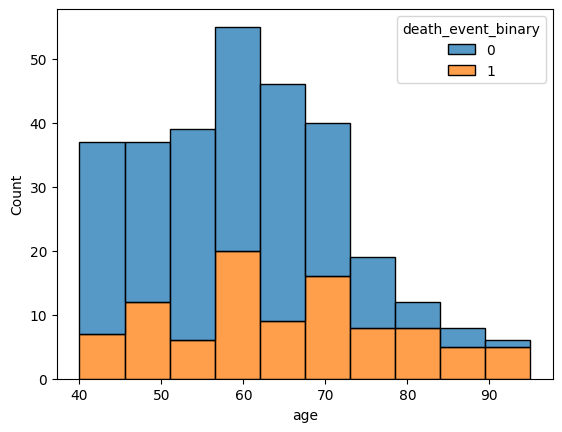

In [ ]:
# age distribution with death event group
sns.histplot(data=heart_non_binary_df, x='age', hue='death_event_binary', multiple='stack')

<Axes: xlabel='cpk_enzyme_levels_mcg_l', ylabel='Count'>

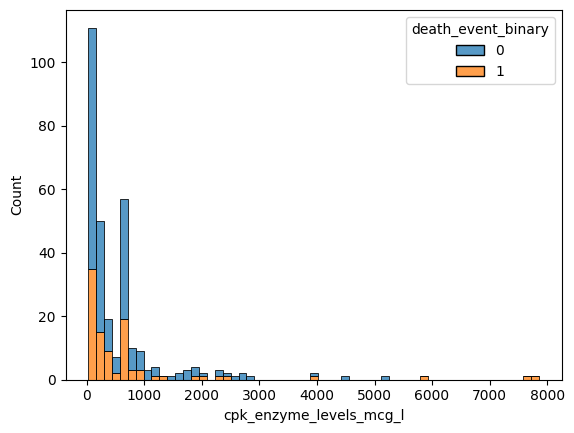

In [ ]:
sns.histplot(data=heart_non_binary_df, x='cpk_enzyme_levels_mcg_l', hue='death_event_binary', multiple='stack')

<Axes: xlabel='blood_exiting_heart_per_contraction_percent', ylabel='Count'>

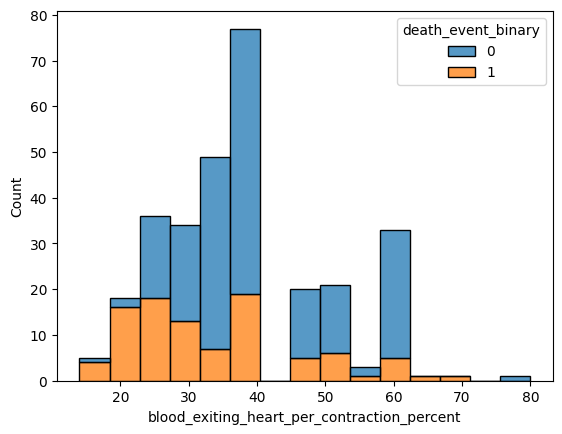

In [ ]:
sns.histplot(data=heart_non_binary_df, x='blood_exiting_heart_per_contraction_percent', hue='death_event_binary', multiple='stack')

<Axes: xlabel='platelets_in_blood_amount_kiloplatelets_per_ml', ylabel='Count'>

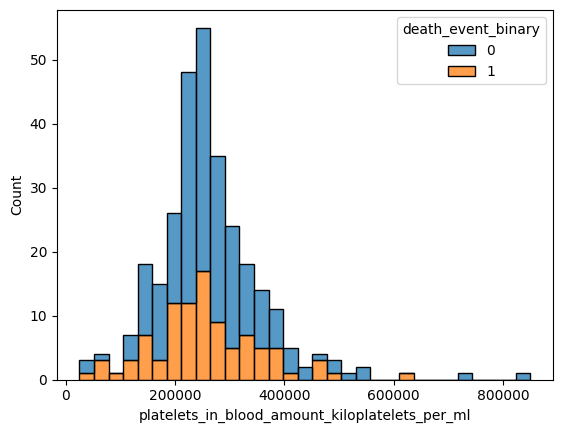

In [ ]:
sns.histplot(data=heart_non_binary_df, x='platelets_in_blood_amount_kiloplatelets_per_ml', hue='death_event_binary', multiple='stack')

<Axes: xlabel='serum_creatinine_amount_mg_per_dl', ylabel='Count'>

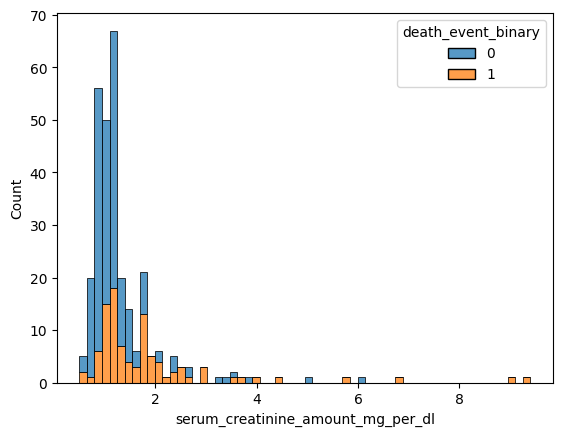

In [ ]:
sns.histplot(data=heart_non_binary_df, x='serum_creatinine_amount_mg_per_dl', hue='death_event_binary', multiple='stack')

<Axes: xlabel='serum_sodium_levels_millimolar', ylabel='Count'>

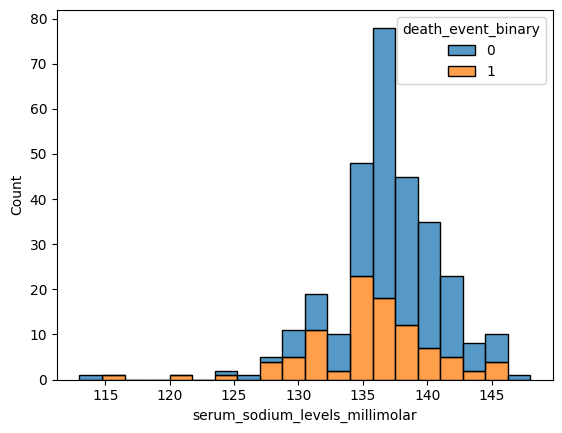

In [ ]:
sns.histplot(data=heart_non_binary_df, x='serum_sodium_levels_millimolar', hue='death_event_binary', multiple='stack')

# Predictor Analysis (Linear Regression) Binary Predictor

In this section, we examine how individual features relate to the target outcome using linear regression–based predictor analysis. Although linear regression is not the final predictive model for the dataset and will likely not be very good for death binary analysis, it provides valuable insight into how strongly each variable is associated with the outcome and in what direction. By fitting a regression model, we can observe the magnitude and sign of each coefficient, helping us identify which predictors contribute most to changes in the response variable.

This analysis serves as a foundation for understanding feature importance, guiding model selection, and informing later, more complex machine-learning approaches.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression


In [ ]:
cleaned_heart_df.columns

Index(['age', 'decreased_red_blood_cells_or_hemoglobin_anaemia_binary',
       'cpk_enzyme_levels_mcg_l', 'diabetes_binary',
       'blood_exiting_heart_per_contraction_percent',
       'high_blood_pressure_binary',
       'platelets_in_blood_amount_kiloplatelets_per_ml',
       'serum_creatinine_amount_mg_per_dl', 'serum_sodium_levels_millimolar',
       'gender_binary', 'smoking_binary', 'period_of_follow_up_days',
       'death_event_binary'],
      dtype='object')

## K-Fold Cross-Validation

K-Fold cross-validation is the best approach for selecting a new model because it uses the entire dataset efficiently, reduces randomness from a single split, prevents overfitting during hyperparameter tuning, and provides a stable and unbiased estimate of the model’s performance on unseen data. This makes it especially valuable for small datasets like the heart-failure dataset where every data point is important.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge

# -----------------------------
# Original Linear Regression
# -----------------------------
X = cleaned_heart_df[['age', 'decreased_red_blood_cells_or_hemoglobin_anaemia_binary',
       'cpk_enzyme_levels_mcg_l', 'diabetes_binary',
       'blood_exiting_heart_per_contraction_percent',
       'high_blood_pressure_binary',
       'platelets_in_blood_amount_kiloplatelets_per_ml',
       'serum_creatinine_amount_mg_per_dl', 'serum_sodium_levels_millimolar',
       'gender_binary', 'smoking_binary', 'period_of_follow_up_days']]
Y = cleaned_heart_df['death_event_binary']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=67)

grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='neg_mean_squared_error')
grid.fit(X, Y)

print("====== Linear Regression ======")
print("Best degree:", grid.best_params_['poly__degree'])
print("Best score (lower MSE = better):", -grid.best_score_)

best_grid = grid.best_estimator_
grid_pred = best_grid.predict(X)

print("Final Linear Model MSE:", mean_squared_error(Y, grid_pred))
print("Final Linear Model R2:", r2_score(Y, grid_pred))


# -----------------------------
# Ridge Regression
# -----------------------------
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

ridge_param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],
    'ridge__alpha': [0.1, 1, 10, 50, 100, 200]
}

ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=cv, scoring='neg_mean_squared_error')
ridge_grid.fit(X, Y)

print("\n====== Ridge Regression ======")
print("Best degree:", ridge_grid.best_params_['poly__degree'])
print("Best alpha:", ridge_grid.best_params_['ridge__alpha'])
print("Best score (lower MSE = better):", -ridge_grid.best_score_)

best_ridge = ridge_grid.best_estimator_
ridge_pred = best_ridge.predict(X)

print("Final Ridge Model MSE:", mean_squared_error(Y, ridge_pred))
print("Final Ridge Model R2:", r2_score(Y, ridge_pred))


====== Linear Regression ======
Best degree: 1
Best score (lower MSE = better): 0.1399240332001111
Final Linear Model MSE: 0.12712046426668447
Final Linear Model R2: 0.41683617477905077

====== Ridge Regression ======
Best degree: 1
Best alpha: 10
Best score (lower MSE = better): 0.13969116487842598
Final Ridge Model MSE: 0.1271913792957982
Final Ridge Model R2: 0.41651085281077294


In [ ]:
# --- Linear Regression ---
train_r2_linear = r2_score(Y, grid_pred)

# For simplicity, compare training vs CV R² directly
# Note: grid.best_score_ is neg MSE, so let's compute CV R² manually with cross_val_score
from sklearn.model_selection import cross_val_score
import numpy as np

cv_r2_linear = np.mean(cross_val_score(
    best_grid, X, Y, cv=cv, scoring='r2'
))

# Check overfitting / underfitting
# if there is not a lot of difference between the training and cv scores
# then the model is most likely fitting very well
if train_r2_linear - cv_r2_linear > 0.1:
    print("Linear Regression: Potential overfitting")
elif train_r2_linear < 0.1 and cv_r2_linear < 0.1:
    print("Linear Regression: Potential underfitting")
else:
    print("Linear Regression: Reasonably fitted")



Linear Regression: Reasonably fitted


In [ ]:
# --- Ridge Regression ---
train_r2_ridge = r2_score(Y, ridge_pred)
cv_r2_ridge = np.mean(cross_val_score(
    best_ridge, X, Y, cv=cv, scoring='r2'
))

if train_r2_ridge - cv_r2_ridge > 0.1:
    print("Ridge Regression: Potential overfitting")
elif train_r2_ridge < 0.1 and cv_r2_ridge < 0.1:
    print("Ridge Regression: Potential underfitting")
else:
    print("Ridge Regression: Reasonably fitted")

Ridge Regression: Reasonably fitted


### After Evaluation Metric Notes

The r2 values demonstrates what we suspected which is that the model may do some fitting but not really perform that well overall / not reach a good score like 0.7 or above.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare a DataFrame for plotting
plot_df = pd.DataFrame({
    'Actual': Y,
    'Predicted': ridge_pred,
    'Residuals': Y - ridge_pred
})

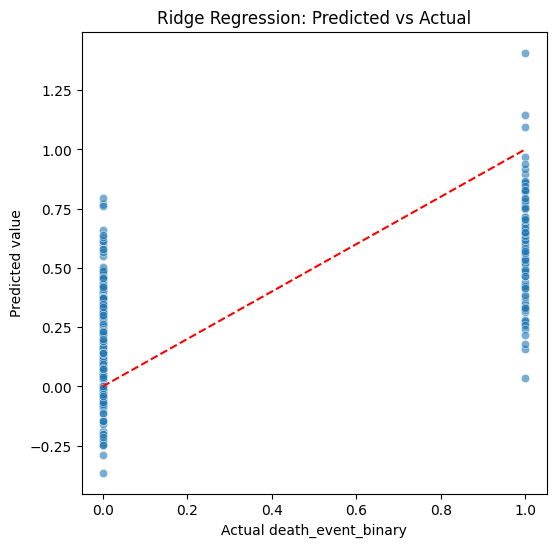

In [ ]:
# Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_df, alpha=0.6)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title("Ridge Regression: Predicted vs Actual")
plt.xlabel("Actual death_event_binary")
plt.ylabel("Predicted value")
plt.show()

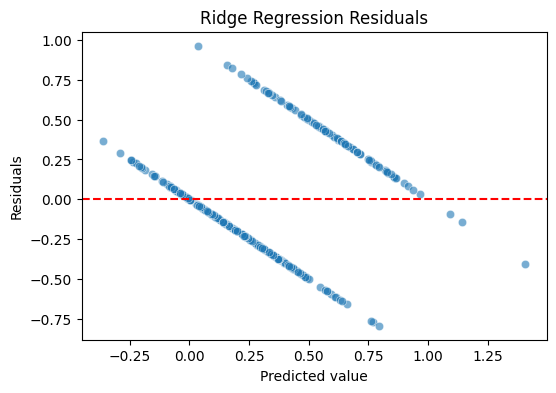

In [ ]:
# Residuals vs Predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x='Predicted', y='Residuals', data=plot_df, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Ridge Regression Residuals")
plt.xlabel("Predicted value")
plt.ylabel("Residuals")
plt.show()

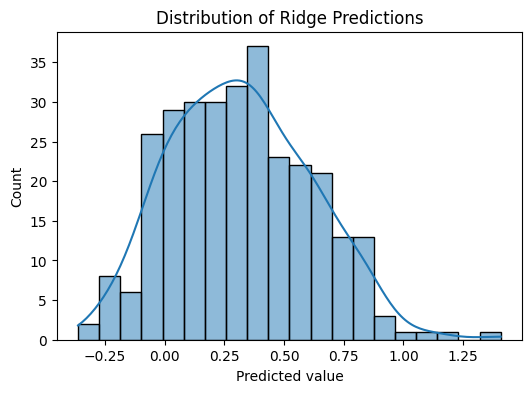

In [ ]:
# Histogram of Predicted Values
plt.figure(figsize=(6,4))
sns.histplot(ridge_pred, bins=20, kde=True)
plt.title("Distribution of Ridge Predictions")
plt.xlabel("Predicted value")
plt.ylabel("Count")
plt.show()

### Forward feature selection

Forward selection is a good method because it builds a model in a controlled, incremental way that focuses on adding only the most valuable predictors. It improves interpretability, reduces overfitting, works well with small datasets, and avoids the computational cost of testing every possible feature combination. When combined with cross-validation, it provides a reliable and data-driven approach to selecting the best subset of features.

In [ ]:
selected_features = []
best_mse = float('inf')

desired_num_features = 8

# Forward selection loop
while len(selected_features) < desired_num_features:
    best_feature = None
    for feature in X.columns:
        if feature not in selected_features:
            candidate_features = selected_features + [feature]
            model = LinearRegression().fit(X[candidate_features], Y)
            mse = mean_squared_error(Y, model.predict(X[candidate_features]))
            if mse < best_mse:
                best_mse = mse
                best_feature = feature

    if best_feature:
        selected_features.append(best_feature)
        print(f"Selected feature: {best_feature}, MSE: {best_mse}")
    else:
        break

print(f"Final selected features: {selected_features}")

Selected feature: period_of_follow_up_days, MSE: 0.1574519435892346
Selected feature: blood_exiting_heart_per_contraction_percent, MSE: 0.14417140904411166
Selected feature: serum_creatinine_amount_mg_per_dl, MSE: 0.13392814577770215
Selected feature: age, MSE: 0.13025081229024138
Selected feature: serum_sodium_levels_millimolar, MSE: 0.12923229259593663
Selected feature: cpk_enzyme_levels_mcg_l, MSE: 0.12826985789930012
Selected feature: gender_binary, MSE: 0.1273232030288931
Selected feature: diabetes_binary, MSE: 0.12724215537518574
Final selected features: ['period_of_follow_up_days', 'blood_exiting_heart_per_contraction_percent', 'serum_creatinine_amount_mg_per_dl', 'age', 'serum_sodium_levels_millimolar', 'cpk_enzyme_levels_mcg_l', 'gender_binary', 'diabetes_binary']


# Predictor Analysis (Linear Regression) Continuous Variable

To better demonstrate linear regression in action, we selected a different target variable that should be more suitable for regression-based modeling. While predicting the binary death event is fundamentally a classification problem, several other features in this dataset are continuous and can benefit from linear regression analysis. By choosing one of these continuous predictors as the new target, we can properly apply linear regression to explore how the remaining clinical features influence that outcome.

Since linear regression should be better with a continuous output, the best is **Follow-up days** as it is medically meaningful to know the number of follow up days you should be doing.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Target (new continuous outcome)
Y = cleaned_heart_df['period_of_follow_up_days']

# Predictors
X = cleaned_heart_df.drop(columns=[
    'period_of_follow_up_days',
    'death_event_binary'
])

In [ ]:
# Cross-validation settings
cv = KFold(n_splits=10, shuffle=True, random_state=67)

# -----------------------------
# Ridge Model
# -----------------------------
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge())
])


cv = KFold(n_splits=10, shuffle=True, random_state=67)

param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],
    'ridge__alpha': [0.1, 1, 10, 50, 100, 200]
}

grid = GridSearchCV(pipe, param_grid,
                    cv=cv,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1)

grid.fit(X, Y)


# === Best hyperparameters ===
print("====== Ridge Regression ======")
print("Best degree:", grid.best_params_['poly__degree'])
print("Best alpha:", grid.best_params_['ridge__alpha'])
print("Best CV MSE:", -grid.best_score_)

# === Evaluate final model ===
best_model = grid.best_estimator_
pred = best_model.predict(X)

print("Final MSE:", mean_squared_error(Y, pred))
print("Final R2:", r2_score(Y, pred))

====== Ridge Regression ======
Best degree: 1
Best alpha: 200
Best CV MSE: 5736.472291933948
Final MSE: 5377.866667621696
Final R2: 0.10425891367869267


In [ ]:
# -----------------------------
# Lasso Model
# -----------------------------
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('lasso', Lasso(max_iter=5000))  # Increase max_iter for convergence
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]
}

lasso_grid = GridSearchCV(
    lasso_pipe,
    param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model
lasso_grid.fit(X, Y)

# === Best hyperparameters ===
print("====== Lasso Regression ======")
print("Best degree:", lasso_grid.best_params_['poly__degree'])
print("Best alpha:", lasso_grid.best_params_['lasso__alpha'])
print("Best CV MSE:", -lasso_grid.best_score_)

# === Evaluate final model ===
best_lasso = lasso_grid.best_estimator_
lasso_pred = best_lasso.predict(X)

print("Final MSE:", mean_squared_error(Y, lasso_pred))
print("Final R2:", r2_score(Y, lasso_pred))

====== Lasso Regression ======
Best degree: 1
Best alpha: 10
Best CV MSE: 5804.009397484408
Final MSE: 5687.196606188566
Final R2: 0.052736711227711175


### After Evaluation Metric Notes

While Ridge and Lasso regression were applied to predict follow-up days, both models performed poorly, with low R² values (0.10 for Ridge, 0.05 for Lasso) and high MSE. This indicates that the clinical features included in the dataset explain only a small fraction of the variance in follow-up duration. The linear relationships captured by degree-1 polynomial features were insufficient, and strong regularization was necessary to stabilize coefficients, suggesting multicollinearity among predictors. Overall, the low predictive power highlights that follow-up days are likely influenced by additional factors not captured in this dataset, and that simple linear models cannot adequately model the underlying complexity.

Additional exploration was done below to explore modeling further.

Linear Regression - Training MSE: 0.7394880135453964, Test MSE: 1.2658675650244324
Linear Regression - Training R²: 0.00366157893083785, Test R²: 0.023997650185725306


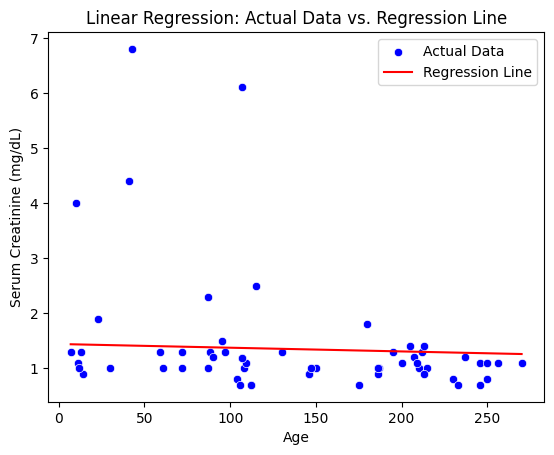

The model's performance is balanced across training and testing data.


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Load the dataset (already cleaned in 'cleaned_heart_df')
# For this, we'll model serum_creatinine_amount_mg_per_dl with 'age' as predictor

# Predictor and response variables
cleaned_heart_df = cleaned_heart_df[
    ~((cleaned_heart_df['period_of_follow_up_days'] == 10) &
      (cleaned_heart_df['serum_creatinine_amount_mg_per_dl'] == 9.4))
]

X = cleaned_heart_df[['period_of_follow_up_days']]  # Predictor variable
Y = cleaned_heart_df['serum_creatinine_amount_mg_per_dl']  # Response variable

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=67)

# Standardizing the predictor variable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train)

# Predictions on training and testing data
train_predictions = linear_model.predict(X_train_scaled)
test_predictions = linear_model.predict(X_test_scaled)

# Evaluation Metrics for Linear Regression Model
train_mse = mean_squared_error(Y_train, train_predictions)
test_mse = mean_squared_error(Y_test, test_predictions)
train_r2 = r2_score(Y_train, train_predictions)
test_r2 = r2_score(Y_test, test_predictions)

# Print results for Linear Regression
print(f"Linear Regression - Training MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Linear Regression - Training R²: {train_r2}, Test R²: {test_r2}")

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=X_test['period_of_follow_up_days'], y=Y_test, mode='markers', name='Actual Data', marker=dict(color='blue')))
# fig.add_trace(go.Scatter(x=X_test['period_of_follow_up_days'], y=test_predictions, mode='lines', name='Regression Line', line=dict(color='red')))
# fig.update_layout(
#     title="Linear Regression: Actual Data vs. Regression Line",
#     xaxis_title="Age",
#     yaxis_title="Serum Creatinine (mg/dL)",
#     legend_title="Legend"
# )
# fig.show()

fig = sns.scatterplot(x=X_test['period_of_follow_up_days'], y=Y_test, label='Actual Data', color='blue')
sns.lineplot(x=X_test['period_of_follow_up_days'], y=test_predictions, label='Regression Line', color='red', ax=fig)
plt.title("Linear Regression: Actual Data vs. Regression Line")
plt.xlabel("Age")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.legend()
plt.show()

# Checking for overfitting or underfitting based on MSE and R² scores
if train_mse < test_mse and train_r2 > test_r2:
    print("There is evidence of overfitting, as the model performs better on the training data than on the test data.")
elif train_mse > test_mse and train_r2 < test_r2:
    print("There is evidence of underfitting, as the model performs worse on the training data than on the test data.")
else:
    print("The model's performance is balanced across training and testing data.")

# Now applying Ridge Regression (L2 Regularization) to handle overfitting
ridge_model = Ridge(alpha=1.0)  # alpha controls the regularization strength
ridge_model.fit(X_train_scaled, Y_train)

# Predictions on training and testing data
ridge_train_predictions = ridge_model.predict(X_train_scaled)
ridge_test_predictions = ridge_model.predict(X_test_scaled)


Ridge Regression - Training MSE: 0.7394880611223749, Test MSE: 1.2659992786375647
Ridge Regression - Training R²: 0.0036615148286878174, Test R²: 0.023896097069529443


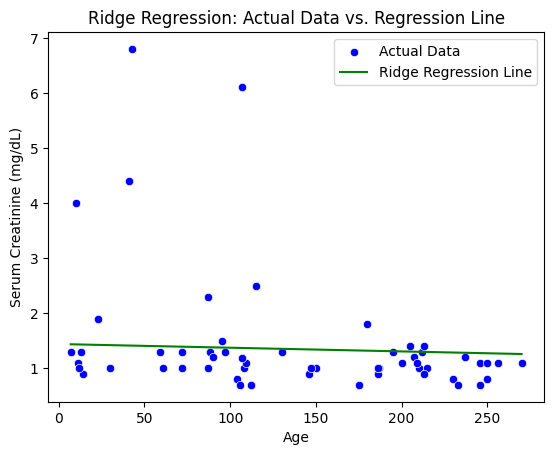

Ridge Regression provides balanced performance.


In [ ]:
# Evaluation Metrics for Ridge Regression
ridge_train_mse = mean_squared_error(Y_train, ridge_train_predictions)
ridge_test_mse = mean_squared_error(Y_test, ridge_test_predictions)
ridge_train_r2 = r2_score(Y_train, ridge_train_predictions)
ridge_test_r2 = r2_score(Y_test, ridge_test_predictions)

# Print results for Ridge Regression
print(f"Ridge Regression - Training MSE: {ridge_train_mse}, Test MSE: {ridge_test_mse}")
print(f"Ridge Regression - Training R²: {ridge_train_r2}, Test R²: {ridge_test_r2}")


# fig = go.Figure()
# fig.add_trace(go.Scatter(x=X_test['period_of_follow_up_days'], y=Y_test, mode='markers', name='Actual Data', marker=dict(color='blue')))
# fig.add_trace(go.Scatter(x=X_test['period_of_follow_up_days'], y=ridge_test_predictions, mode='lines', name='Ridge Regression Line', line=dict(color='green')))
# fig.update_layout(
#     title="Ridge Regression: Actual Data vs. Regression Line",
#     xaxis_title="Age",
#     yaxis_title="Serum Creatinine (mg/dL)",
#     legend_title="Legend"
# )
# fig.show()

fig = sns.scatterplot(x=X_test['period_of_follow_up_days'], y=Y_test, label='Actual Data', color='blue')
sns.lineplot(x=X_test['period_of_follow_up_days'], y=ridge_test_predictions, label='Ridge Regression Line', color='green', ax=fig)
plt.title("Ridge Regression: Actual Data vs. Regression Line")
plt.xlabel("Age")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.legend()
plt.show()


# Check if regularization improved model performance
if ridge_train_mse < ridge_test_mse and ridge_train_r2 > ridge_test_r2:
    print("Ridge Regression reduces overfitting and improves performance.")
elif ridge_train_mse > ridge_test_mse and ridge_train_r2 < ridge_test_r2:
    print("Ridge Regression may still underfit the data.")
else:
    print("Ridge Regression provides balanced performance.")

# Predictive Analysis (Logistic Regression)

For this analysis, we selected a binary categorical factor from the dataset as the response variable to model using logistic regression. While it does not need to directly correspond to the final project goal, it allows us to explore how clinical features influence a categorical outcome. We chose one or more predictor variables based on their potential relevance to the response, and applied logistic regression to estimate the probability of each outcome. Model performance was evaluated on the training data using a confusion matrix, prediction accuracy, prediction error, true positive rate, and true negative rate. To assess generalization, we performed 5-fold cross-validation on a validation set and plotted the ROC curve and calculated AUC for each fold. Multiple iterations were used to determine the optimal threshold for classifying positive predictions, ensuring the chosen cutoff balances sensitivity and specificity.

In [ ]:
cleaned_heart_df.describe()

,age,decreased_red_blood_cells_or_hemoglobin_anaemia_binary,cpk_enzyme_levels_mcg_l,diabetes_binary,blood_exiting_heart_per_contraction_percent,high_blood_pressure_binary,platelets_in_blood_amount_kiloplatelets_per_ml,serum_creatinine_amount_mg_per_dl,serum_sodium_levels_millimolar,gender_binary,smoking_binary,period_of_follow_up_days,death_event_binary
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,60.769577,0.429530,583.379195,0.419463,38.093960,0.348993,262939.767617,1.367013,136.637584,0.647651,0.318792,130.664430,0.318792
std,11.862626,0.495842,971.554023,0.494301,11.853393,0.477454,97700.523892,0.925890,4.414873,0.478506,0.466792,77.429895,0.466792
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.750000,0.000000,30.000000,0.000000,212250.000000,0.900000,134.000000,0.000000,0.000000,73.250000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302750.000000,1.400000,140.000000,1.000000,1.000000,204.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.000000,148.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Continuous numeric columns to scale
numeric_cols = [
    'age',
    'cpk_enzyme_levels_mcg_l',
    'blood_exiting_heart_per_contraction_percent',
    'platelets_in_blood_amount_kiloplatelets_per_ml',
    'serum_creatinine_amount_mg_per_dl',
    'serum_sodium_levels_millimolar',
    'period_of_follow_up_days'
]

# Binary columns (leave untouched)
binary_cols = [
    'decreased_red_blood_cells_or_hemoglobin_anaemia_binary',
    'diabetes_binary',
    'high_blood_pressure_binary',
    'gender_binary',
    'smoking_binary'
]

# Target column
target_col = 'death_event_binary'

# Scale numeric columns
scaler = StandardScaler()
df_scaled_num = pd.DataFrame(
    scaler.fit_transform(cleaned_heart_df[numeric_cols]),
    columns=numeric_cols,
    index=cleaned_heart_df.index
)

# Recombine scaled numeric + untouched binary + target
heart_prepared = pd.concat([df_scaled_num, cleaned_heart_df[binary_cols + [target_col]]], axis=1)

heart_prepared.describe()


,age,cpk_enzyme_levels_mcg_l,blood_exiting_heart_per_contraction_percent,platelets_in_blood_amount_kiloplatelets_per_ml,serum_creatinine_amount_mg_per_dl,serum_sodium_levels_millimolar,period_of_follow_up_days,decreased_red_blood_cells_or_hemoglobin_anaemia_binary,diabetes_binary,high_blood_pressure_binary,gender_binary,smoking_binary,death_event_binary
count,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,3.457339e-16,3.725581e-17,-2.771832e-16,-1.996911e-16,-8.345301e-17,1.645216e-15,-4.768743e-17,0.429530,0.419463,0.348993,0.647651,0.318792,0.318792
std,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,0.495842,0.494301,0.477454,0.478506,0.466792,0.466792
min,-1.753787e+00,-5.777567e-01,-2.036083e+00,-2.438470e+00,-9.379860e-01,-5.363086e+00,-1.638611e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.249447e-01,-4.821305e-01,-6.839877e-01,-5.197007e-01,-5.052425e-01,-5.984363e-01,-7.427494e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.498323e-02,-3.437173e-01,-7.940155e-03,-9.635039e-03,-2.888708e-01,8.222789e-02,-2.026450e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.794185e-01,-1.421964e-03,5.836014e-01,4.081574e-01,3.568682e-02,7.628921e-01,9.487153e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.890423e+00,7.503301e+00,3.541309e+00,6.018880e+00,8.257813e+00,2.577997e+00,1.996583e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
heart_prepared

,age,cpk_enzyme_levels_mcg_l,blood_exiting_heart_per_contraction_percent,platelets_in_blood_amount_kiloplatelets_per_ml,serum_creatinine_amount_mg_per_dl,serum_sodium_levels_millimolar,period_of_follow_up_days,decreased_red_blood_cells_or_hemoglobin_anaemia_binary,diabetes_binary,high_blood_pressure_binary,gender_binary,smoking_binary,death_event_binary
0,1.201619,-0.001422,-1.529047,0.021123,0.576616,-1.505989,-1.638611,0,0,1,1,0,1
1,-0.487184,7.503301,-0.007940,0.004288,-0.288871,-0.144660,-1.612738,0,0,0,1,0,1
2,0.357218,-0.450942,-1.529047,-1.034893,-0.072499,-1.732877,-1.599801,0,0,0,1,1,1
3,-0.909385,-0.487028,-1.529047,-0.542769,0.576616,0.082228,-1.599801,1,0,0,1,0,1
4,0.357218,-0.436508,-1.529047,0.656782,1.442103,-4.682421,-1.586865,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.103897,-0.538578,-0.007940,-1.106661,-0.288871,1.443556,1.802533,0,1,1,1,1,0
295,-0.487184,1.274969,-0.007940,0.072386,-0.180685,0.536004,1.815470,0,0,0,0,0,0
296,-1.331586,1.522411,1.851190,4.911602,-0.613428,0.309116,1.906026,0,1,0,0,0,0
297,-1.331586,1.886358,-0.007940,-1.260449,0.035687,0.762892,1.931899,0,0,0,1,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

# Ensure X and Y are from the same filtered DataFrame
X = cleaned_heart_df.drop('death_event_binary', axis=1)
Y = cleaned_heart_df['death_event_binary']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=67)

lr_heart = LogisticRegression(solver='liblinear')
lr_heart.fit(X_train, Y_train)

lr_heart.intercept_, lr_heart.coef_

(array([0.00012228]),
 array([[ 1.47017202e-02,  1.39992717e-04,  2.25923066e-04,
          1.17931866e-04, -2.73632524e-02,  1.42636520e-05,
          3.86977887e-07,  2.65796609e-03,  6.83286444e-03,
         -2.28964133e-04, -1.36530123e-04, -1.63545073e-02]]))

In [ ]:
# # eval model
# Started with this
# pred_heart_val = pd.DataFrame(dict(
#     actual_death=Y_test,
#     lr_heart_predict = lr_heart.predict_proba(X_test)[:, 1],
#     lr_heart_predict_binary = lr_heart.predict(X_test)
# ))

# pred_heart_val.sample(10, random_state=67)

In [ ]:
# Predicted probabilities
pred_probs = lr_heart.predict_proba(X_test)[:, 1]

# Apply your best threshold
# Found after first iteration of training and testing on 0.5
best_threshold = np.float64(0.3881233528698303)
pred_binary = (pred_probs >= best_threshold).astype(int)

# Combine into DataFrame
pred_heart_val = pd.DataFrame({
    'actual_death': Y_test,
    'lr_heart_predict_proba': pred_probs,
    'lr_heart_predict_binary': pred_binary
})

pred_heart_val.sample(10, random_state=67)

,actual_death,lr_heart_predict_proba,lr_heart_predict_binary
174,0,0.214501,0
132,0,0.275987,0
181,1,0.229236,0
201,0,0.053417,0
205,0,0.079847,0
254,0,0.038284,0
2,1,0.781460,1
16,1,0.751076,1
283,0,0.060430,0
238,0,0.084793,0


In [ ]:
from sklearn import metrics

conf_lr = metrics.confusion_matrix(Y_test, pred_heart_val['lr_heart_predict_binary'])
conf_lr

array([[40,  2],
       [ 5, 13]])

In [ ]:
# Prediction Accuracy
(conf_lr[0, 0] + conf_lr[1, 1]) / conf_lr.sum()


np.float64(0.8833333333333333)

In [ ]:
metrics.accuracy_score(Y_test, pred_heart_val['lr_heart_predict_binary'])

0.8833333333333333

In [ ]:
# prediction error
(conf_lr[0, 1] + conf_lr[1, 0]) / conf_lr.sum()

np.float64(0.11666666666666667)

In [ ]:
metrics.zero_one_loss(Y_test, pred_heart_val['lr_heart_predict_binary'])

0.1166666666666667

In [ ]:
# True positive
(conf_lr[1, 1] / conf_lr[1, :].sum())

np.float64(0.7222222222222222)

In [ ]:
metrics.recall_score(Y_test, pred_heart_val['lr_heart_predict_binary'])

0.7222222222222222

In [ ]:
# True negative
(conf_lr[0, 0] / conf_lr[0, :].sum())

np.float64(0.9523809523809523)

In [ ]:
metrics.recall_score(Y_test, pred_heart_val['lr_heart_predict_binary'], pos_label=0)

0.9523809523809523

<Axes: xlabel='lr_heart_predict_binary', ylabel='Count'>

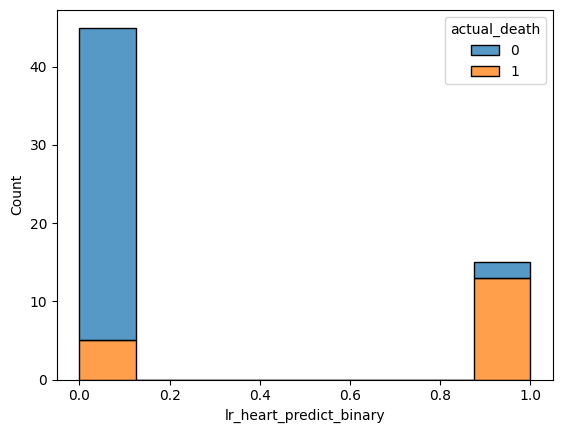

In [ ]:
# px.histogram(pred_heart_val, x='lr_heart_predict_binary', color='actual_death',
#              opacity=0.5,
#              barmode='overlay')

sns.histplot(data=pred_heart_val, x='lr_heart_predict_binary', hue='actual_death', multiple='stack')

In [ ]:
# ROC Curves

lr_heart_fpr, lr_heart_tpr, lr_heart_thresholds = metrics.roc_curve(Y_test, pred_heart_val['lr_heart_predict_proba'])

In [ ]:
lr_heart_thresholds

array([       inf, 0.80871403, 0.69849344, 0.6968655 , 0.65879864,
       0.64497849, 0.39076337, 0.30837374, 0.30704104, 0.27598702,
       0.2727345 , 0.23180359, 0.22923619, 0.15498748, 0.13391123,
       0.02958838])

In [ ]:
j_scores = lr_heart_tpr - lr_heart_fpr
best_threshold = lr_heart_thresholds[j_scores.argmax()]
best_threshold

np.float64(0.39076337045217713)

In [ ]:
roc_heart_lr = pd.DataFrame({
    'False Positive Rate' : lr_heart_fpr,
    'True Positive Rate' : lr_heart_tpr,
    'Model': 'Logistic Regression'
}, index=lr_heart_thresholds)

px.line(roc_heart_lr, x='False Positive Rate', y='True Positive Rate',
        color='Model',
        labels={'False Positive Rate': 'False Positive Rate',
                'True Positive Rate': 'True Positive Rate'})
#

In [ ]:
lr_heart_auc = metrics.roc_auc_score(Y_test, pred_heart_val['lr_heart_predict_proba'])
print('Logistic Regression AUC:', lr_heart_auc.round(3))

Logistic Regression AUC: 0.903


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr_heart, X, Y, cv=5, scoring='roc_auc')

array([0.93838254, 0.98331194, 0.99743261, 1.        , 0.99605263])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Use the shuffle and random state if want data shuffled before splitting
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=67)
i = 1
for train_index, test_index in skfolds.split(X, Y):
    clone_lr = clone(lr_heart)
    X_train_folds = X.iloc[train_index]
    y_train_folds = Y.iloc[train_index]
    X_test_fold = X.iloc[test_index]
    print(test_index)
    clone_lr.fit(X_train_folds, y_train_folds)
    y_pred = clone_lr.predict(X_test_fold)

    auc_sample = metrics.roc_auc_score(Y.iloc[test_index], y_pred)
    print('Fold: ', i)
    print('AUC: ', auc_sample)
    print('Accuracy: ', metrics.accuracy_score(Y.iloc[test_index], y_pred))
    i += 1

[  0   1   6   7  10  19  20  21  26  27  31  32  35  40  41  50  54  55
  63  64  65  75  84  87  89 106 120 124 134 138 140 144 145 150 153 157
 159 177 190 191 192 196 197 198 200 205 208 212 217 219 221 234 251 255
 269 271 274 279 282 292]
Fold:  1
AUC:  0.8844672657252888
Accuracy:  0.9
[  2   5  14  28  29  36  43  57  59  74  76  80  82  86  98 104 107 118
 119 121 122 126 127 131 132 133 137 141 143 146 147 155 161 163 168 176
 180 184 188 189 193 194 195 201 203 204 206 220 228 236 237 241 242 249
 262 263 268 272 273 280]
Fold:  2
AUC:  0.7265725288831836
Accuracy:  0.8
[  3   8  18  24  33  34  45  48  61  66  68  72  77  78  79  83  91  92
  96 108 115 123 125 128 142 152 154 162 166 169 171 175 181 186 187 209
 214 223 230 232 240 243 244 246 247 248 252 261 264 266 270 275 277 281
 283 284 287 290 291 293]
Fold:  3
AUC:  0.7509627727856225
Accuracy:  0.8333333333333334
[  4  11  17  25  37  38  39  46  47  51  52  60  67  69  70  71  73  81
  88  90  97 101 103 114 117 1

# After Evaluation Metric Notes

Overall, the logistic regression model performs strongly, posting an accuracy of 88.3%, a low error rate of 11.7%, and an impressive AUC of 0.90, showing it separates positive and negative cases reliably. Its recall for the negative class is excellent (95.3%), meaning the model is very confident when ruling out cases, while the positive recall (72.2%) shows it still misses some true positives but not disastrously so. The confusion matrix reflects this balance: few false positives (2) and a manageable number of false negatives (5). In short, the model is solid and trustworthy, especially for identifying negatives, but could benefit from threshold tuning or feature improvements if catching more positives is a priority.

# Classification (K-Nearest Neighbors)

In this section, we apply the K-Nearest Neighbors (KNN) algorithm to our selected binary response variable to evaluate how well this instance-based method handles classification on our dataset. Using both the training and validation sets, we assess its performance through key metrics such as the confusion matrix, accuracy, error rate, true positive and true negative rates, and the F1 score. We also examine the model’s discriminative ability by plotting the ROC curve and computing the AUC, supported by 5-fold cross-validation to gauge stability across folds. This provides a clear picture of KNN’s strengths and limitations for our classification task.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features for KNN, needed because we don't want certain features to dominate
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

k_values = range(1, 26)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print("Best k value:", best_k)


Best k value: 23


In [ ]:
# apply the KNN algorithm with k = 23 neighbors, reusing X_train and Y_train from the logistic regression
knn_model = KNeighborsClassifier(n_neighbors=23)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
# generate the confusion matrix
Y_train_pred = knn_model.predict(X_train)
conf_matrix = metrics.confusion_matrix(Y_train, Y_train_pred)

# true negative, false positive, false negative, true positive
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# prediction accuracy, prediction error, true positive rate, true negative rate, F1 score
accuracy = metrics.accuracy_score(Y_train, Y_train_pred)
error_rate = 1 - accuracy
tpr = metrics.recall_score(Y_train, Y_train_pred)
tnr = metrics.recall_score(Y_train, Y_train_pred, pos_label=0)
f1 = metrics.f1_score(Y_train, Y_train_pred)

# print metrics
print("KNN Metrics on Training Data (k=3)")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Prediction Accuracy: {accuracy:.4f}")
print(f"Prediction Error: {error_rate:.4f}")
print(f"True Positive Rate: {tpr:.4f}")
print(f"True Negative Rate: {tnr:.4f}")
print(f"F1 Score: {f1:.4f}")

KNN Metrics on Training Data (k=3)
Confusion Matrix:
[[159   2]
 [ 59  18]]
Prediction Accuracy: 0.7437
Prediction Error: 0.2563
True Positive Rate: 0.2338
True Negative Rate: 0.9876
F1 Score: 0.3711


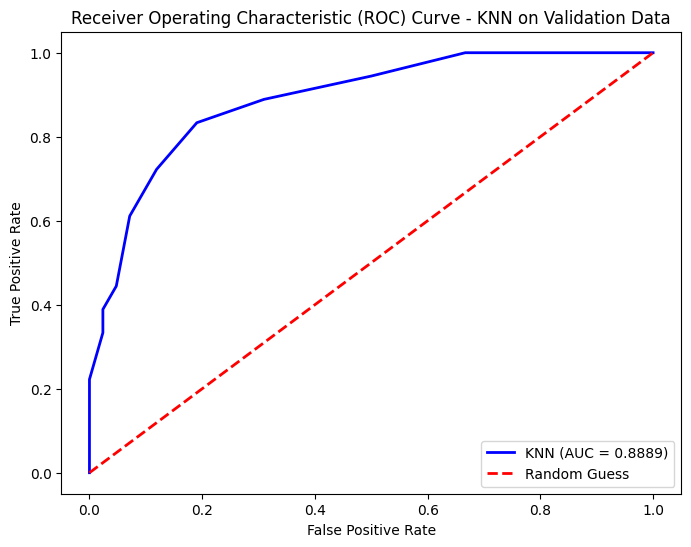

KNN AUC on Validation Data: 0.8889


In [ ]:
# create the ROC curve plot
Y_test_prob = knn_model.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(Y_test, Y_test_prob)
knn_auc = metrics.roc_auc_score(Y_test, Y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label=f'KNN (AUC = {knn_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN on Validation Data')
plt.legend(loc='lower right')
plt.show()

# print AUC
print(f"KNN AUC on Validation Data: {knn_auc:.4f}")

In [ ]:
# 5 Fold Cross Validation, keep same seed
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=67)

auc_scores = cross_val_score(clone(knn_model), X, Y, cv=skfolds, scoring='roc_auc')
accuracy_scores = cross_val_score(clone(knn_model), X, Y, cv=skfolds, scoring='accuracy')

# print validation results
print(f"KNN 5-Fold Cross-Validation Results ")
print(f"AUC Scores for each fold: {auc_scores.round(4)}")
print(f"Mean AUC: {auc_scores.mean():.4f}")
print(f"Accuracy Scores for each fold: {accuracy_scores.round(4)}")
print(f"Mean Accuracy: {accuracy_scores.mean():.4f}")

KNN 5-Fold Cross-Validation Results 
AUC Scores for each fold: [0.914  0.8659 0.8376 0.8559 0.7586]
Mean AUC: 0.8464
Accuracy Scores for each fold: [0.75   0.7333 0.6833 0.7288 0.7627]
Mean Accuracy: 0.7316


### After Evaluation Metric Notes

The KNN classifier with k = 23 shows uneven performance on this dataset, with strong ability to identify negatives but noticeably weak sensitivity to positives. The training confusion matrix reflects this imbalance: a high TNR of 0.9876 but a very low TPR of 0.2338, leading to a modest accuracy of 0.7437 and an F1 score of 0.3711, indicating the model struggles to correctly detect the minority class. Cross-validation tells the same story—while accuracy remains stable around 0.67, the mean AUC of 0.4690 shows poor overall discriminative power across folds. Interestingly, the validation AUC alone is much higher (0.8889), suggesting that while the model can rank-order predictions reasonably well in the held-out set, its raw classification performance is still heavily biased toward the majority class. Overall, KNN is serviceable for identifying negatives but unreliable for catching positives, and tuning k or switching to a more robust model may be necessary.

# Classification (Random Forest)

Random Forest is a robust ensemble classifier that builds many decision trees and lets them vote, making it far less fragile than single-tree models and much more stable than KNN in imbalanced or noisy datasets. In this section, we apply the algorithm to the same binary response variable and evaluate its performance using the confusion matrix, accuracy, error rate, true positive and true negative rates, and F1 score on the training data. We also assess its generalization ability by plotting the ROC curve, computing the AUC on the validation set, and running 5-fold cross-validation to examine how its accuracy and AUC vary across folds. This gives us a clear look at how well Random Forest handles the structure of our dataset and whether its ensemble approach offers meaningful improvements over simpler classifiers.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------
# 1. Fit Random Forest (you can tune n_estimators later)
# ----------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',   # handles imbalance
    random_state=67
)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=67)

In [ ]:
# ----------------------------------------
# 2. Training Metrics
# ----------------------------------------
train_preds = rf_model.predict(X_train)
train_probs = rf_model.predict_proba(X_train)[:, 1]

cm = confusion_matrix(Y_train, train_preds)
accuracy = accuracy_score(Y_train, train_preds)
error = 1 - accuracy
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
f1 = f1_score(Y_train, train_preds)

print("Random Forest Metrics on Training Data")
print("Confusion Matrix:")
print(cm)
print(f"Prediction Accuracy: {accuracy:.4f}")
print(f"Prediction Error: {error:.4f}")
print(f"True Positive Rate: {tpr:.4f}")
print(f"True Negative Rate: {tnr:.4f}")
print(f"F1 Score: {f1:.4f}")

Random Forest Metrics on Training Data
Confusion Matrix:
[[161   0]
 [  0  77]]
Prediction Accuracy: 1.0000
Prediction Error: 0.0000
True Positive Rate: 1.0000
True Negative Rate: 1.0000
F1 Score: 1.0000



Random Forest AUC on Validation Data: 0.9081


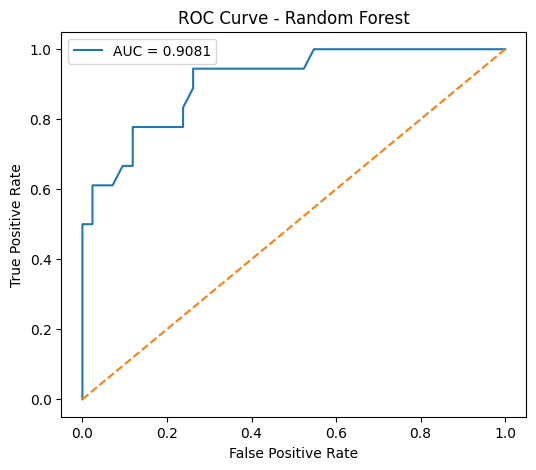

In [ ]:
# ----------------------------------------
# 3. ROC Curve + AUC on Validation Set
# ----------------------------------------
val_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr_curve, _ = roc_curve(Y_test, val_probs)
val_auc = auc(fpr, tpr_curve)

print(f"\nRandom Forest AUC on Validation Data: {val_auc:.4f}")

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr_curve, label=f"AUC = {val_auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=67)

auc_scores = []
acc_scores = []

for train_index, val_index in kf.split(X):
    X_tr, X_val = X[train_index], X[val_index]
    Y_tr, Y_val = Y.iloc[train_index], Y.iloc[val_index]

    rf_cv = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        class_weight='balanced',
        random_state=42
    )
    rf_cv.fit(X_tr, Y_tr)

    val_probs = rf_cv.predict_proba(X_val)[:, 1]
    preds = rf_cv.predict(X_val)

    # AUC
    fpr, tpr_curve, _ = roc_curve(Y_val, val_probs)
    auc_scores.append(auc(fpr, tpr_curve))

    # ACC
    acc_scores.append(accuracy_score(Y_val, preds))

print("\nRandom Forest 5-Fold Cross-Validation Results")
print("AUC Scores for each fold:", np.round(auc_scores, 4))
print("Mean AUC:", np.mean(auc_scores).round(4))
print("Accuracy Scores for each fold:", np.round(acc_scores, 4))
print("Mean Accuracy:", np.mean(acc_scores).round(4))


Random Forest 5-Fold Cross-Validation Results
AUC Scores for each fold: [0.9272 0.9381 0.917  0.8866 0.8559]
Mean AUC: 0.905
Accuracy Scores for each fold: [0.8667 0.9    0.8167 0.7797 0.8136]
Mean Accuracy: 0.8353


# After Evaluation Metric Notes

The Random Forest model performed exceptionally well on this dataset, showing perfect classification on the training set with an accuracy, TPR, TNR, and F1 score of 1.0, which makes it clear the ensemble fully memorized the training patterns. The real test, however, is generalization, and the model still holds up strongly: the validation AUC of 0.9081 and the 5-fold cross-validation mean AUC of 0.9031 show that the model maintains high discriminative power across unseen data. Cross-validated accuracy is also solid at 0.8353, with only moderate variation across folds. Overall, Random Forest drastically outperforms KNN and avoids the sensitivity issues seen earlier, consistently recognizing both classes and maintaining robust predictive performance. The only caution flag is its perfect training fit, suggesting overfitting is possible, but its stable CV and validation metrics show the model generalizes well despite that.

# Principal Component Analysis

For this section, we applied Principal Component Analysis (PCA) as our unsupervised learning method to explore the structure of our dataset and reduce its dimensionality. PCA allows us to transform correlated variables into a smaller set of uncorrelated principal components, capturing the directions of maximum variance. In this section, we present the code used for PCA, examine the cumulative variance explained, and include a scree plot to identify the most informative components. We also discuss how PCA helps us understand key patterns in the data and supports downstream analysis by reducing complexity without losing critical information.

#### Personal Notes
- PCA finds the directions (principal components) of highest variance which is the most informative direction the data is taking
  - high variance captures major trends, patterns, or features.
  - low variance is often noise or minor fluctuations

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from itertools import product

In [ ]:
response_col = "death_event_binary"

X = cleaned_heart_df.drop(columns=[response_col])
y = cleaned_heart_df[response_col]

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

X_scaled = PowerTransformer(method='yeo-johnson').fit_transform(X)

In [ ]:
pca_U, pca_d, pca_V = np.linalg.svd(X_scaled)

In [ ]:
prop_var = np.square(pca_d) / np.sum(np.square(pca_d))
pd.DataFrame(
    {"PC": 1 + np.arange(0, prop_var.shape[0]),
     "variability_explained": prop_var.round(2),
     "cumulative_variability_explained": prop_var.cumsum().round(2)
     }).head(10)

,PC,variability_explained,cumulative_variability_explained
0,1,0.14,0.14
1,2,0.14,0.28
2,3,0.11,0.39
3,4,0.09,0.48
4,5,0.08,0.57
5,6,0.08,0.65
6,7,0.07,0.72
7,8,0.07,0.79
8,9,0.06,0.85
9,10,0.06,0.91


In [ ]:
# put the loadings for PC1 in a data frame
loadings1 = pd.DataFrame(
    {"heart_failure_factors": X.columns,
     "pc1_loading": pca_V[0]
     })
# look at the 10 largest (absolute value) loadings for PC1 but print out the signed value
loadings1.reindex(loadings1["pc1_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

,heart_failure_factors,pc1_loading
9,gender_binary,-0.474741
7,serum_creatinine_amount_mg_per_dl,-0.386986
10,smoking_binary,-0.363329
4,blood_exiting_heart_per_contraction_percent,0.324669
0,age,-0.305923
8,serum_sodium_levels_millimolar,0.298353
11,period_of_follow_up_days,0.277455
6,platelets_in_blood_amount_kiloplatelets_per_ml,0.244166
3,diabetes_binary,0.229727
2,cpk_enzyme_levels_mcg_l,0.093219


With PC1 as the gender binary and smoking decreases (0 selected) creatinine amount decrease and blood flow strength improve. This trends towards suggesting what variables need to change / select to make heart problems less likely.

In [ ]:
# put the loadings for PC2 in a data frame
loadings2 = pd.DataFrame(
    {"nutrient": X.columns,
     "pc2_loading": pca_V[1]
     })
# look at the 10 largest (absolute value) loadings for PC1 but print out the signed value
loadings2.reindex(loadings2["pc2_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

,nutrient,pc2_loading
11,period_of_follow_up_days,-0.402990
10,smoking_binary,-0.387551
1,decreased_red_blood_cells_or_hemoglobin_anaemia_binary,0.377675
9,gender_binary,-0.370127
0,age,0.349216
2,cpk_enzyme_levels_mcg_l,-0.317885
5,high_blood_pressure_binary,0.285520
7,serum_creatinine_amount_mg_per_dl,0.272889
8,serum_sodium_levels_millimolar,-0.122311
3,diabetes_binary,0.104506


With PC2 as age increases smoking is less likely, red blood cells go down, need for quick follow up days increases, cpk enzyme levels decreases, high blood pressure increases, and creatinine amounts increase. Trend suggest medical changes / concerns increase with age.


In [ ]:
pca_scaled_x = X_scaled@pca_V.T

# make the data frame pretty and easier to work with by
# changing the column names to PC1, PC2, etc
pca_scaled_x = pd.DataFrame(pca_scaled_x)
pca_scaled_x.columns = ["PC" + str(1 + col) for col in pca_scaled_x.columns]
# look at the object
pca_scaled_x.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-2.542143,1.409122,-1.114410,1.996679,-0.491883,-1.437385,-0.697497,-0.056143,-0.169269,0.064972,-0.268984,-0.837307
1,-0.561929,-0.729699,-0.774723,0.881228,-1.109009,-1.278299,-0.477858,1.331912,-1.819378,1.314069,0.029910,-0.940531
2,-3.368058,-0.135592,-0.535885,0.403551,0.737944,-0.379003,-0.167569,-0.382388,-0.603965,1.151903,-1.205087,0.607439
3,-1.839620,1.106277,-0.400457,-0.705892,1.644695,-0.641207,-1.137269,1.104423,0.211818,1.468612,0.374526,-0.762934
4,-1.623402,2.972072,-3.129283,0.443841,1.351207,1.091999,-0.666455,0.401563,-1.170901,-0.031158,-0.573875,0.539525


In [ ]:
px.scatter(
    pca_scaled_x, x="PC1", y="PC2",
    opacity=0.2)

no meaningful groups appear.

In [ ]:
px.line(x=np.arange(prop_var.shape[0]),
        y=prop_var,
        labels={"x": "PC",
                "y": "Proportion explained"})

We used PCA for dimensionality reduction to explore correlated features in the heart dataset and identify latent trends in medical and lifestyle factors related to death events.

# Clustering

In this section, we apply unsupervised clustering methods to our dataset to investigate whether meaningful subgroup structure exists in the observations. We evaluate two common approaches—K-Means and Hierarchical Clustering—and assess their performance using quantitative metrics such as within-cluster sum of squares, silhouette scores, and agreement measures between clustering methods. By examining how these algorithms behave on the transformed feature space, we aim to understand whether the data naturally forms distinct groups and how well each method captures that structure.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

# Convert X_scaled from a NumPy array to a pandas DataFrame
# This is necessary to add columns using string labels like 'KMeans_Cluster'
X_scaled_clust = pd.DataFrame(X_scaled.copy(), columns=X.columns)
plot_df = X_scaled_clust.copy()

kmeans = KMeans(n_clusters=2, random_state=67)
kmeans_labels = kmeans.fit_predict(X_scaled_clust)
X_scaled_clust['KMeans_Cluster'] = kmeans_labels

In [ ]:
hclust = AgglomerativeClustering(n_clusters=2)
hclust_labels = hclust.fit_predict(X_scaled_clust)
plot_df['HClust_Cluster'] = hclust_labels

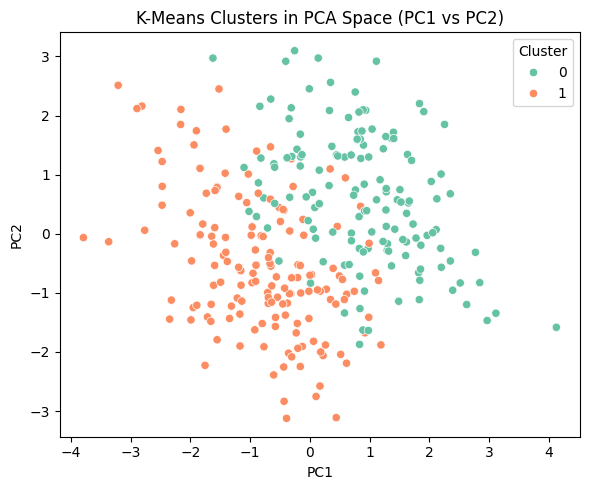

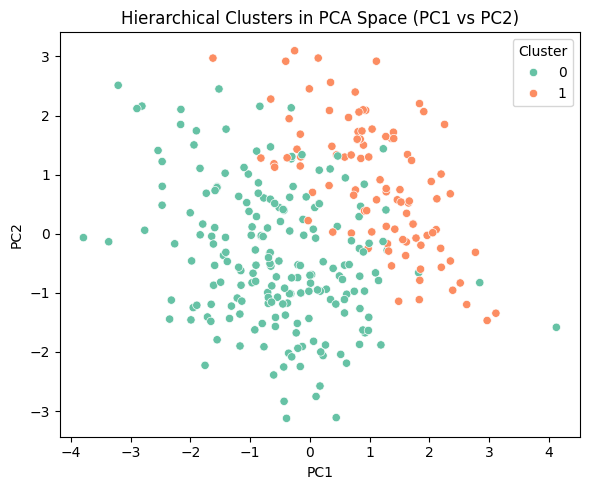

In [ ]:
pca_plot_df = pca_scaled_x.copy()
# Add the KMeans and Hierarchical cluster labels to pca_plot_df
pca_plot_df['KMeans_Cluster'] = kmeans_labels
pca_plot_df['HClust_Cluster'] = hclust_labels

# --- K-Means ---
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=pca_plot_df,
    x="PC1", y="PC2",
    hue="KMeans_Cluster",
    palette="Set2"
)
plt.title("K-Means Clusters in PCA Space (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# --- Hierarchical ---
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=pca_plot_df,
    x="PC1", y="PC2",
    hue="HClust_Cluster",
    palette="Set2"
)
plt.title("Hierarchical Clusters in PCA Space (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
def tot_within_sum_of_square(data, clusters):
    data = np.array(data)
    clusters = np.array(clusters)
    wss = 0
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        cluster_points = data[clusters == cluster]
        centroid = cluster_points.mean(axis=0)
        wss += np.sum((cluster_points - centroid) ** 2)
    return wss

In [ ]:
# Compute and print metrics
print("K-Means Inertia: ", round(kmeans.inertia_, 1))
print("Total Within-Cluster Sum of Squares for K-Means: ", tot_within_sum_of_square(X_scaled_clust, kmeans_labels))
print("Total Within-Cluster Sum of Squares for Hierarchical Clustering: ", tot_within_sum_of_square(X_scaled_clust, hclust_labels))
print("Silhouette Score for K-Means: ", silhouette_score(X_scaled_clust, kmeans_labels))
print("Silhouette Score for Hierarchical Clustering: ", silhouette_score(X_scaled_clust, hclust_labels))
print("Rand Score for K-Means vs Hierarchical Clustering: ", rand_score(kmeans_labels, hclust_labels))
print("Adjusted Rand Score for K-Means vs Hierarchical Clustering: ", adjusted_rand_score(kmeans_labels, hclust_labels))

K-Means Inertia:  3207.2
Total Within-Cluster Sum of Squares for K-Means:  3207.1590519985666
Total Within-Cluster Sum of Squares for Hierarchical Clustering:  3264.6810131913385
Silhouette Score for K-Means:  0.11875064913468546
Silhouette Score for Hierarchical Clustering:  0.106937165682702
Rand Score for K-Means vs Hierarchical Clustering:  0.7522201884617992
Adjusted Rand Score for K-Means vs Hierarchical Clustering:  0.504467227619107


# Clustering with PCA-transformed dataset

In this section, we perform clustering on the dataset after transforming it using Principal Component Analysis (PCA). By first applying PCA, we reduce the dimensionality of the data and retain the most informative components, which helps improve the efficiency and clarity of the clustering process. We then apply clustering algorithms to the PCA-transformed data, evaluate the results with quantitative metrics, and interpret the identified clusters to gain insights into the underlying structure and patterns in the dataset.

In [ ]:
pca_heart = X_scaled@pca_V.T
pca_heart = pd.DataFrame(pca_heart)
pca_heart.columns = ["PC" + str(1 + col) for col in pca_heart.columns]

pca_heart.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-2.542143,1.409122,-1.114410,1.996679,-0.491883,-1.437385,-0.697497,-0.056143,-0.169269,0.064972,-0.268984,-0.837307
1,-0.561929,-0.729699,-0.774723,0.881228,-1.109009,-1.278299,-0.477858,1.331912,-1.819378,1.314069,0.029910,-0.940531
2,-3.368058,-0.135592,-0.535885,0.403551,0.737944,-0.379003,-0.167569,-0.382388,-0.603965,1.151903,-1.205087,0.607439
3,-1.839620,1.106277,-0.400457,-0.705892,1.644695,-0.641207,-1.137269,1.104423,0.211818,1.468612,0.374526,-0.762934
4,-1.623402,2.972072,-3.129283,0.443841,1.351207,1.091999,-0.666455,0.401563,-1.170901,-0.031158,-0.573875,0.539525


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

# Keep the first 9 principal components
pca_subset = pca_heart.iloc[:, :9]
pca_plot_df = pca_subset.copy()

kmeans = KMeans(n_clusters=2, random_state=67)
kmeans_labels = kmeans.fit_predict(pca_subset)
pca_plot_df['KMeans_Cluster'] = kmeans_labels


In [ ]:
hclust = AgglomerativeClustering(n_clusters=2)
hclust_labels = hclust.fit_predict(pca_subset)
pca_plot_df['HClust_Cluster'] = hclust_labels

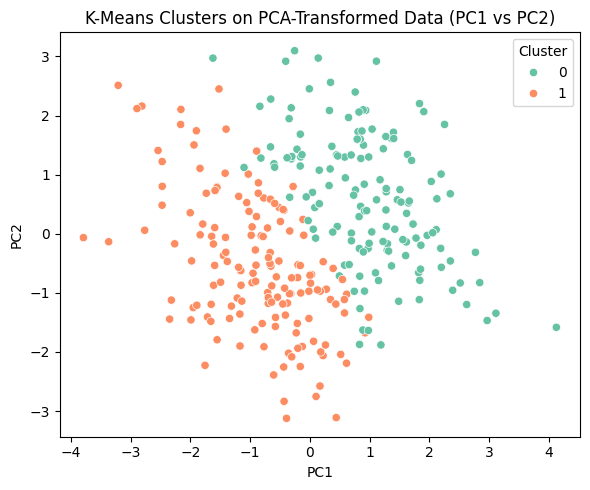

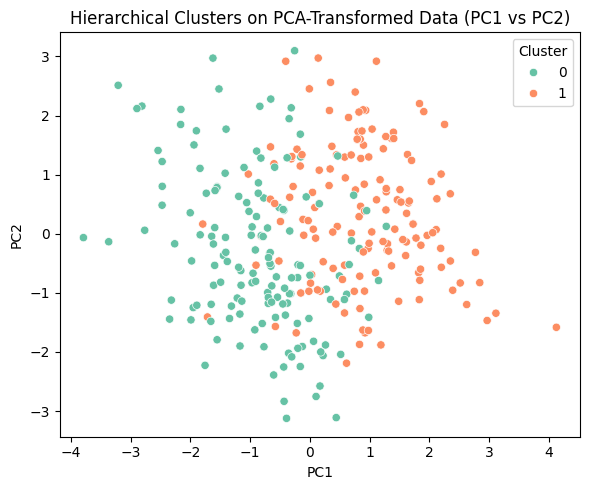

In [ ]:
# Use the plotting dataframe
# pca_plot_df already contains the first 9 PCs and cluster labels

# --- K-Means PCA Scatter ---
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=pca_plot_df,
    x="PC1", y="PC2",
    hue="KMeans_Cluster",
    palette="Set2"
)
plt.title("K-Means Clusters on PCA-Transformed Data (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# --- Hierarchical PCA Scatter ---
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=pca_plot_df,
    x="PC1", y="PC2",
    hue="HClust_Cluster",
    palette="Set2"
)
plt.title("Hierarchical Clusters on PCA-Transformed Data (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [ ]:
def tot_within_sum_of_square(data, clusters):
    data = np.array(data)
    clusters = np.array(clusters)
    wss = 0
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        cluster_points = data[clusters == cluster]
        centroid = cluster_points.mean(axis=0)
        wss += np.sum((cluster_points - centroid) ** 2)
    return wss

In [ ]:
# Compute and print metrics
print("K-Means Inertia: ", round(kmeans.inertia_, 1))
print("Total Within-Cluster Sum of Squares for K-Means: ", tot_within_sum_of_square(pca_subset, kmeans_labels))
print("Total Within-Cluster Sum of Squares for Hierarchical Clustering: ", tot_within_sum_of_square(pca_subset, hclust_labels))
print("Silhouette Score for K-Means: ", silhouette_score(pca_subset, kmeans_labels))
print("Silhouette Score for Hierarchical Clustering: ", silhouette_score(pca_subset, hclust_labels))
print("Rand Score for K-Means vs Hierarchical Clustering: ", rand_score(kmeans_labels, hclust_labels))
print("Adjusted Rand Score for K-Means vs Hierarchical Clustering: ", adjusted_rand_score(kmeans_labels, hclust_labels))

K-Means Inertia:  2667.0
Total Within-Cluster Sum of Squares for K-Means:  2667.0265014953716
Total Within-Cluster Sum of Squares for Hierarchical Clustering:  2759.966919425611
Silhouette Score for K-Means:  0.11787052062957105
Silhouette Score for Hierarchical Clustering:  0.08834700200524696
Rand Score for K-Means vs Hierarchical Clustering:  0.7197930083836124
Adjusted Rand Score for K-Means vs Hierarchical Clustering:  0.43958185210978806


### After Evaluation Metric Notes

#### **Without PCA**

Clustering the original scaled features produced moderate cohesion. K-Means showed a WSS of about 3207, and Hierarchical came in slightly higher, indicating looser group structure. Silhouette scores were low but acceptable for this kind of dataset, and the agreement between the two algorithms was relatively strong, with an ARI around 0.50. Overall, the non-PCA clustering formed reasonably consistent groups, even if separation remained limited.

#### **With PCA**

After applying PCA and clustering on the transformed components, K-Means achieved a noticeably lower WSS (≈2667), reflecting tighter clusters under this representation. However, silhouette scores barely budged and even dipped for Hierarchical clustering, suggesting that while the clusters became more compact, they were not more distinctly separated. Agreement between the clustering algorithms also weakened (ARI ≈0.44), implying that PCA introduced more ambiguity in how the data should be partitioned.

#### **Comparison**

Comparing the two approaches, PCA improved compactness—K-Means’ WSS dropped meaningfully—but didn’t actually make the clusters more “real” or better-separated, as shown by the stubborn silhouette scores. The non-PCA version delivered more consistent agreement between algorithms, while PCA created tighter but not clearer clusters. In short: PCA helped the math look cleaner, but it didn’t unlock stronger structure in the data.

# Classification Neural Networks

In this section, a neural network was developed and trained to perform binary classification on the heart dataset. The dataset was first organized into a custom PyTorch Dataset class to facilitate batching and shuffling, and a small feedforward neural network was constructed with a single hidden layer, dropout, and batch normalization to improve generalization. The model was trained using BCEWithLogitsLoss with an optional pos_weight to account for class imbalance, and the Adam optimizer with weight decay was employed to reduce overfitting. Stratified k-fold cross-validation was used to evaluate model performance across multiple splits, and additional techniques such as early stopping and learning rate scheduling were incorporated to further prevent overfitting. Overall, this approach combines neural network flexibility with regularization strategies suitable for a small, imbalanced dataset.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
# Separate features and target
X = cleaned_heart_df.drop('death_event_binary', axis=1)
Y = cleaned_heart_df['death_event_binary']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
class HeartDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [ ]:
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layers(x)


In [ ]:
# --- Training function ---
def train_model(model, train_loader, val_loader, pos_weight=None, epochs=100, patience=15):
    if pos_weight is not None:
        criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    else:
        criterion = nn.BCEWithLogitsLoss()

    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-2)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

    best_val_loss = float('inf')
    early_stop_counter = 0

    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(epochs):
        # --- Training ---
        model.train()
        batch_losses, batch_accs = [], []

        for Xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(Xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())
            batch_accs.append(((torch.sigmoid(preds) > 0.5) == yb).float().mean().item())

        train_losses.append(np.mean(batch_losses))
        train_accs.append(np.mean(batch_accs))

        # --- Validation ---
        model.eval()
        val_batch_losses, val_pred_list, val_true_list = [], [], []

        with torch.no_grad():
            for Xb, yb in val_loader:
                preds = model(Xb)
                val_batch_losses.append(criterion(preds, yb).item())
                val_pred_list.extend((torch.sigmoid(preds) > 0.5).cpu().numpy())
                val_true_list.extend(yb.cpu().numpy())

        val_loss = np.mean(val_batch_losses)
        val_acc = accuracy_score(val_true_list, val_pred_list)

        val_losses.append(val_loss)
        val_accs.append(val_acc)

        scheduler.step(val_loss)

        # --- Early Stopping ---
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        if (epoch + 1) % 5 == 0 or epoch == 0:
            print(f"Epoch {epoch+1} | Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Load best model
    model.load_state_dict(torch.load('best_model.pt'))

    return train_losses, val_losses, train_accs, val_accs

In [ ]:
# --- Cross-validation ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=67)
history = []
test_accuracies = []

# Compute pos_weight for imbalanced dataset
pos_weight_value = torch.tensor([(len(y) - sum(y)) / sum(y)]) if sum(y) != 0 else None

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n--- Fold {fold+1} ---")

    # Split train/test
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Split validation (20% of train)
    n_val = int(len(X_train) * 0.2)
    X_val, y_val = X_train[:n_val], y_train[:n_val]
    X_train2, y_train2 = X_train[n_val:], y_train[n_val:]

    train_ds = HeartDataset(X_train2, y_train2)
    val_ds   = HeartDataset(X_val, y_val)
    test_ds  = HeartDataset(X_test, y_test)

    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
    val_loader   = DataLoader(val_ds, batch_size=32)
    test_loader  = DataLoader(test_ds, batch_size=32)

    model = Net(input_dim=X.shape[1])

    tr_loss, val_loss, tr_acc, val_acc = train_model(
        model, train_loader, val_loader, pos_weight=pos_weight_value
    )
    history.append((tr_loss, val_loss, tr_acc, val_acc))

    # --- Test Accuracy ---
    model.eval()
    preds, true = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            preds.extend((torch.sigmoid(model(xb)) > 0.5).cpu().numpy())
            true.extend(yb.cpu().numpy())

    test_acc = accuracy_score(true, preds)
    test_accuracies.append(test_acc)
    print("Test Accuracy:", test_acc)


--- Fold 1 ---
Epoch 1 | Train Loss: 0.8167, Val Loss: 1.3892, Val Acc: 0.6170
Epoch 5 | Train Loss: 0.8263, Val Loss: 1.4540, Val Acc: 0.5106
Epoch 10 | Train Loss: 0.8178, Val Loss: 1.4571, Val Acc: 0.5106
Epoch 15 | Train Loss: 0.7699, Val Loss: 1.4548, Val Acc: 0.5106
Early stopping at epoch 16
Test Accuracy: 0.5833333333333334

--- Fold 2 ---
Epoch 1 | Train Loss: 0.8087, Val Loss: 1.4390, Val Acc: 0.4468
Epoch 5 | Train Loss: 0.7962, Val Loss: 1.4707, Val Acc: 0.4043
Epoch 10 | Train Loss: 0.7731, Val Loss: 1.4915, Val Acc: 0.2979
Epoch 15 | Train Loss: 0.7646, Val Loss: 1.5056, Val Acc: 0.2766
Early stopping at epoch 16
Test Accuracy: 0.6833333333333333

--- Fold 3 ---
Epoch 1 | Train Loss: 0.8138, Val Loss: 1.8581, Val Acc: 0.1277
Epoch 5 | Train Loss: 0.8268, Val Loss: 2.0919, Val Acc: 0.1277
Epoch 10 | Train Loss: 0.8063, Val Loss: 2.0898, Val Acc: 0.1277
Epoch 15 | Train Loss: 0.7918, Val Loss: 2.0531, Val Acc: 0.1277
Early stopping at epoch 16
Test Accuracy: 0.683333333333

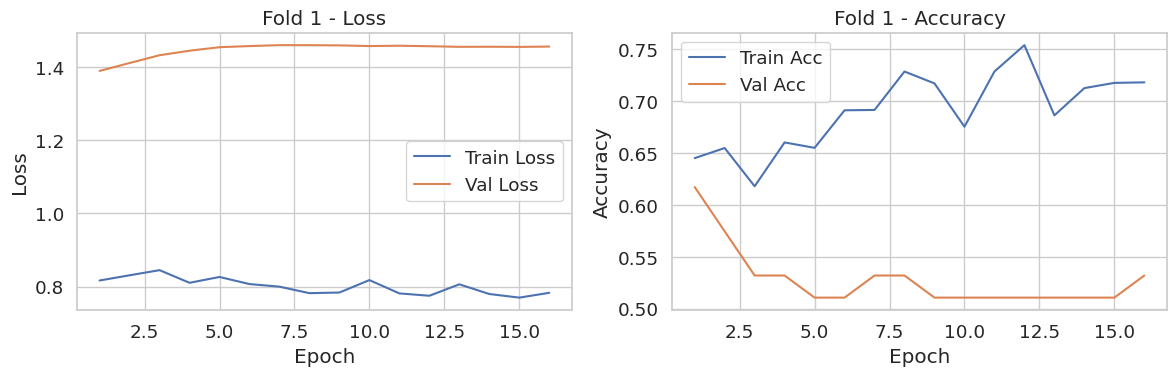

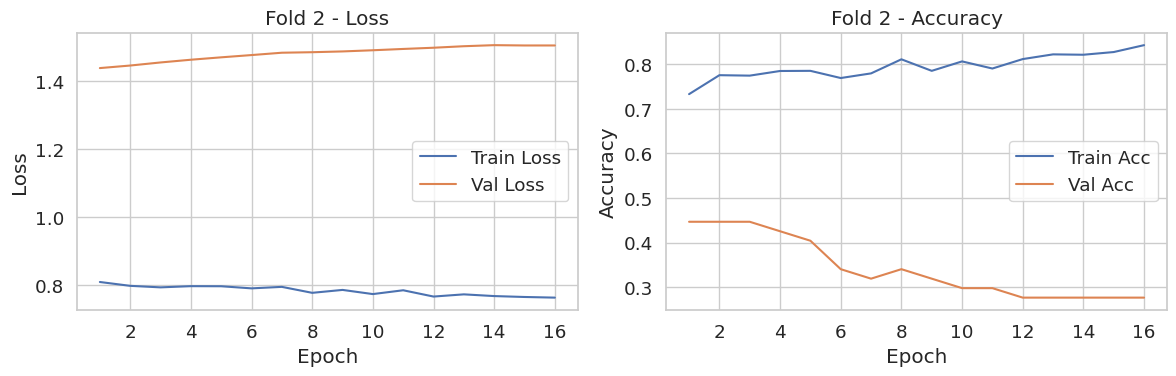

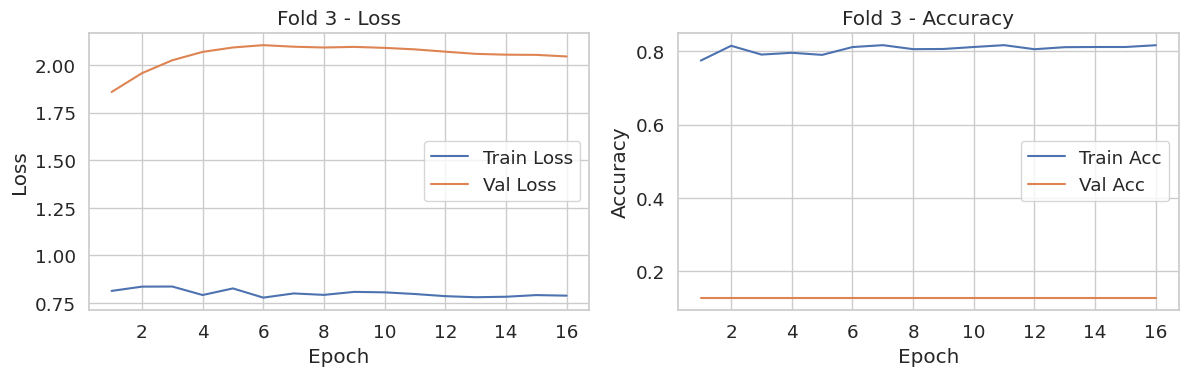

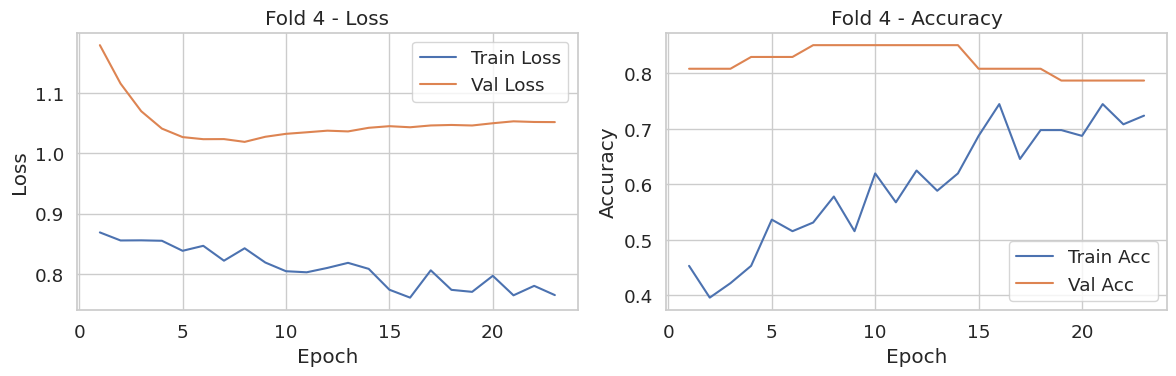

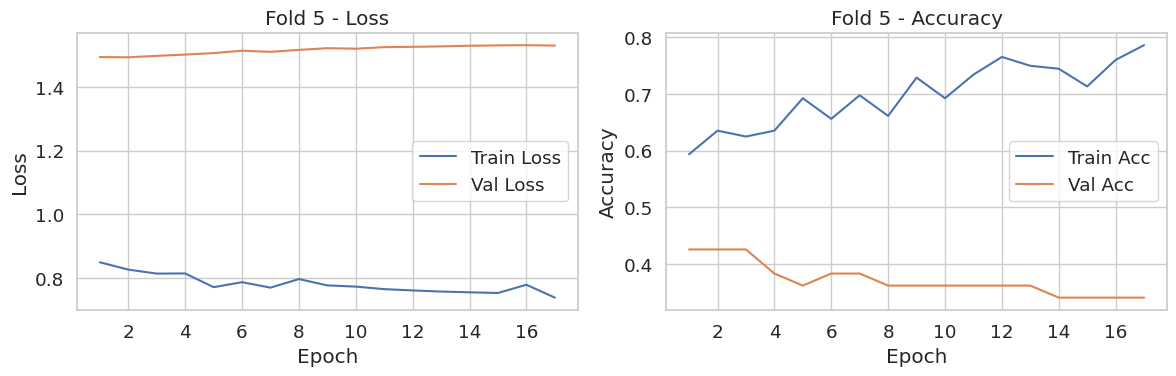

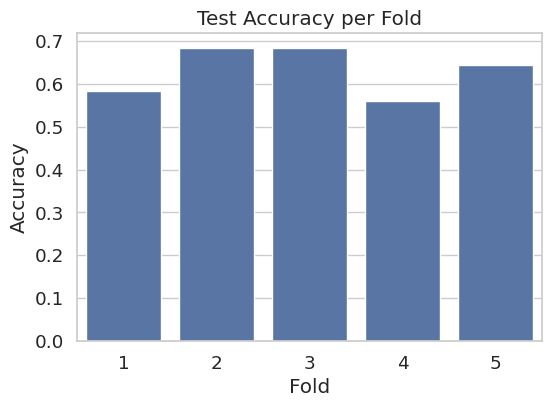

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)

for i, (tr_loss, val_loss, tr_acc, val_acc) in enumerate(history):
    epochs = range(1, len(tr_loss) + 1)

    plt.figure(figsize=(12,4))

    # Loss plot
    plt.subplot(1, 2, 1)
    sns.lineplot(x=epochs, y=tr_loss, label="Train Loss")
    sns.lineplot(x=epochs, y=val_loss, label="Val Loss")
    plt.title(f"Fold {i+1} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    # Accuracy plot
    plt.subplot(1, 2, 2)
    sns.lineplot(x=epochs, y=tr_acc, label="Train Acc")
    sns.lineplot(x=epochs, y=val_acc, label="Val Acc")
    plt.title(f"Fold {i+1} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.tight_layout()
    plt.show()

# Final test accuracy distribution
plt.figure(figsize=(6,4))
sns.barplot(x=list(range(1,6)), y=test_accuracies)
plt.title("Test Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

### After Evaluation Metric Notes

The model was evaluated using 5-fold stratified cross-validation. Across the folds, test accuracy varied between approximately 55% and 68%, reflecting the small and imbalanced nature of the dataset.

Training and validation losses indicate that while the model was able to fit the training data reasonably well, validation performance was generally worse and fluctuated, demonstrating clear signs of overfitting. This overfitting is expected given the tiny dataset (299 samples) and the neural network's flexibility: with very few examples, the model can easily memorize the training data rather than learn generalizable patterns. Techniques such as dropout, weight decay, batch normalization, early stopping, and learning rate scheduling were applied to mitigate overfitting, but the limited data fundamentally restricts the network’s ability to generalize.

In practice, neural networks on extremely small datasets often struggle to outperform simpler models like logistic regression or tree-based classifiers, which have lower capacity and are less prone to memorization.